In [ ]:
import numpy as np
import pandas  as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()  # create encoder object
df["sex"] = le.fit_transform(df["sex"])
df["region"] = le.fit_transform(df["region"]) 
df["smoker"] = le.fit_transform(df["smoker"]) 

In [ ]:
x=df[["age","smoker","bmi","sex","children"]]
y=df["charges"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
ss.fit_transform(x_train)

array([[ 0.47222651, -0.50874702, -1.75652513, -1.0246016 ,  0.73433626],
       [ 0.54331294, -0.50874702, -1.03308239, -1.0246016 , -0.91119211],
       [ 0.8987451 , -0.50874702, -0.94368672, -1.0246016 , -0.91119211],
       ...,
       [ 1.3252637 , -0.50874702, -0.89153925,  0.97598911, -0.91119211],
       [-0.16755139,  1.96561348,  2.82086429, -1.0246016 ,  0.73433626],
       [ 1.1120044 , -0.50874702, -0.10932713,  0.97598911, -0.91119211]])

In [ ]:
ss.transform(x_test)

array([[ 0.40114007, -0.50874702, -0.89153925, -1.0246016 ,  0.73433626],
       [-0.23863782, -0.50874702, -0.08946143, -1.0246016 , -0.91119211],
       [ 1.75178229,  1.96561348, -0.60845296, -1.0246016 , -0.91119211],
       ...,
       [-0.09646495, -0.50874702, -0.41972876,  0.97598911, -0.08842793],
       [ 1.04091797,  1.96561348,  2.78941026, -1.0246016 , -0.91119211],
       [ 0.82765867, -0.50874702,  0.60252728, -1.0246016 , -0.08842793]])

TRAINING THE MODEL

In [ ]:
model = RandomForestRegressor(
    n_estimators=200,   # increase trees
    max_depth=100,     # let it grow deeper
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)


In [ ]:
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=100, n_estimators=200, random_state=42)

In [ ]:
yp=model.predict(x_test)

In [ ]:
model.score(x_test,y_test)

0.8591510175586086

In [ ]:
m=mean_squared_error(yp,y_test)
m

21866625.855933104

In [ ]:
model.predict([[45,1,23.4,1,2]])

C:\Users\adull\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([23064.08326525])

In [ ]:
r=r2_score(yp,y_test)
r*100

84.88348774302854

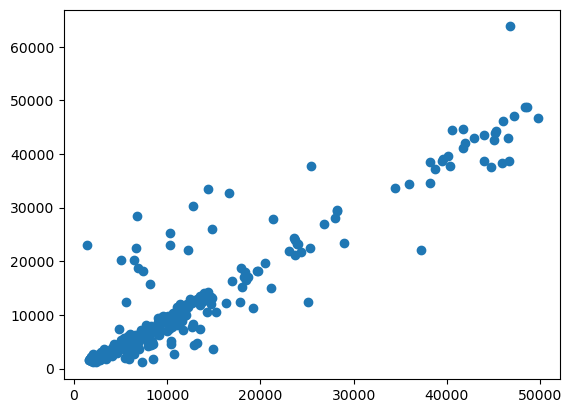

In [ ]:
plt.scatter(yp,y_test)

In [ ]:
rr=y_test-yp
rr

764     -1966.165184
887        69.272808
890      1109.249606
1293      -39.228888
259      -664.298337
            ...     
109       -97.893265
575      -207.267252
535       326.782934
543     16952.118469
846      -165.131411
Name: charges, Length: 268, dtype: float64

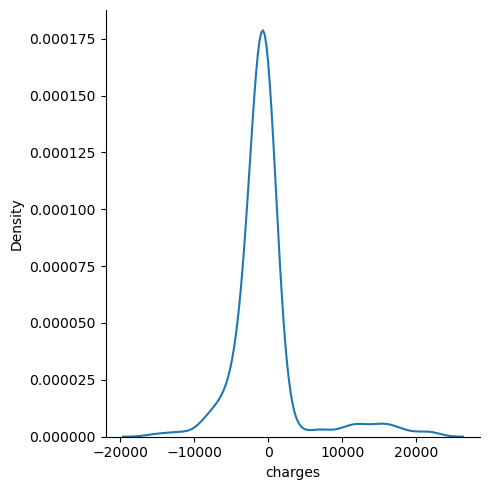

In [ ]:
sns.displot(rr,kind="kde")

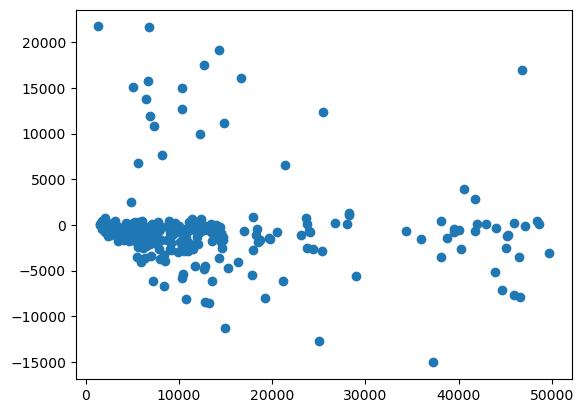

In [ ]:
plt.scatter(yp,rr)

NEW PREDICTION DATA

In [ ]:
model.predict(ss.transform([[45,1,33,0,4]]))

C:\Users\adull\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\adull\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([13837.8045245])

PICKLING THE MODEL FILE FOR DEPLOYMENT 

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open("formodel.pkl","wb"))

In [ ]:
pickled_model=pickle.load(open("formodel.pkl","rb"))

In [ ]:
pickled_model.predict(ss.transform([[45,1,33,0,4]]))

C:\Users\adull\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\adull\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([13837.8045245])